In [1]:
# Define the conversion function
def celsius_to_fahrenheit(celsius):
    fahrenheit = (celsius * 9/5) + 32
    return fahrenheit

# Example usage
celsius_value = 37
fahrenheit_value = celsius_to_fahrenheit(celsius_value)
print(f"{celsius_value}°C is equal to {fahrenheit_value}°F")


37°C is equal to 98.6°F


Predicted: 37°C is approximately 98.60°F


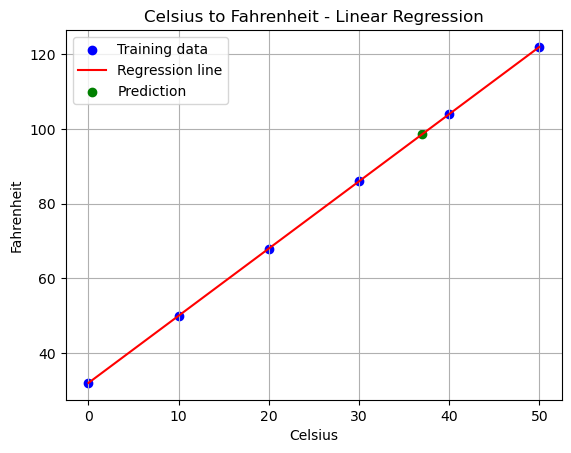

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
# Sample data: Celsius and corresponding Fahrenheit
celsius = np.array([[0], [10], [20], [30], [40], [50]])
fahrenheit = np.array([[32], [50], [68], [86], [104], [122]])
# Create and train the model
model = LinearRegression()
model.fit(celsius, fahrenheit)
# Predict a new value
new_celsius = 37
predicted_fahrenheit = model.predict([[new_celsius]])
print(f"Predicted: {new_celsius}°C is approximately {predicted_fahrenheit[0][0]:.2f}°F")

# Optional: Plotting the data and prediction
plt.scatter(celsius, fahrenheit, color='blue', label='Training data')
plt.plot(celsius, model.predict(celsius), color='red', label='Regression line')
plt.scatter([new_celsius], predicted_fahrenheit, color='green', label='Prediction')
plt.xlabel("Celsius")
plt.ylabel("Fahrenheit")
plt.legend()
plt.title("Celsius to Fahrenheit - Linear Regression")
plt.grid(True)
plt.show()


Predicted (size 1500 sq. ft): $300.00k


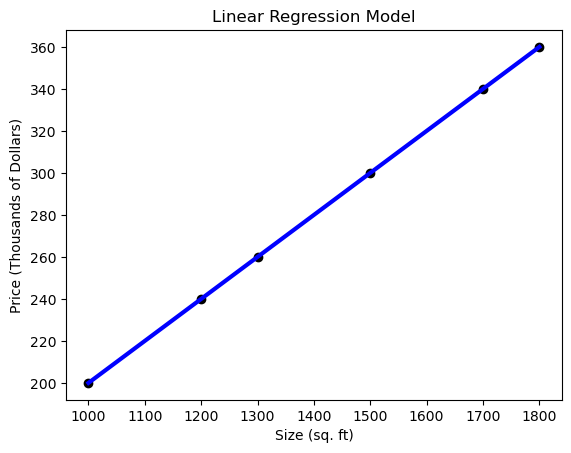

In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Sample data: sizes in square feet and corresponding prices in thousands of dollars
sizes = np.array([[1000], [1200], [1300], [1500], [1700], [1800]])
prices = np.array([[200], [240], [260], [300], [340], [360]])

# Create and train the model
model = LinearRegression()
model.fit(sizes, prices)

# Make predictions
new_size = np.array([1500]).reshape(-1, 1)
predicted_price = model.predict(new_size)

# Print the predicted price
print(f"Predicted (size 1500 sq. ft): ${predicted_price[0][0]:.2f}k")

# Plot the regression line
plt.scatter(sizes, prices, color='black')
plt.plot(sizes, model.predict(sizes), color='blue', linewidth=3)
plt.xlabel('Size (sq. ft)')
plt.ylabel('Price (Thousands of Dollars)')
plt.title('Linear Regression Model')
plt.show()


Mean Squared Error on Test Set: 282546.24


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


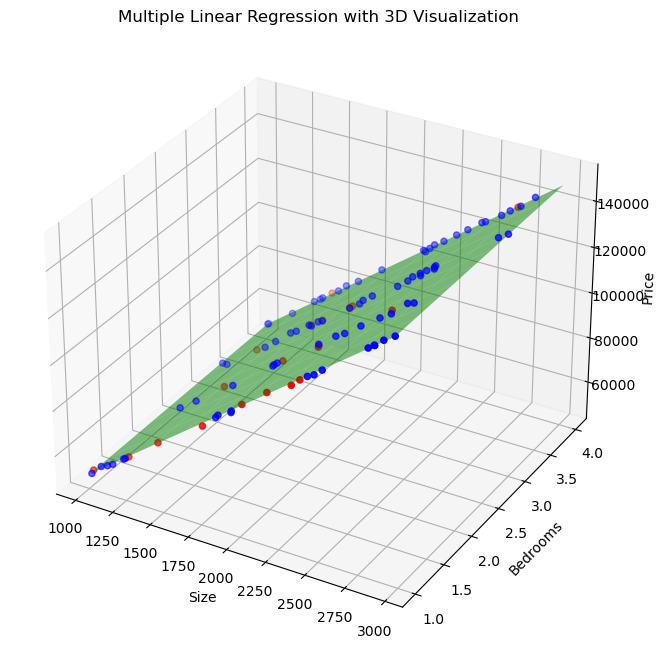

In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D

# Generate some example data
np.random.seed(42)

# Assume 100 houses with random sizes and number of bedrooms
sizes = np.random.randint(1000, 3000, 100)
bedrooms = np.random.randint(1, 5, 100)
prices = 50 * sizes + 30 * bedrooms + np.random.normal(0, 500, 100)
# Price = 50 * size + 30 * bedrooms + noise

# Create a DataFrame to organize the data
data = pd.DataFrame({'Size': sizes, 'Bedrooms': bedrooms, 'Price': prices})

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Prepare the input features (X) and target variable (y) for training
X_train = train_data[['Size', 'Bedrooms']]
y_train = train_data['Price']

# Create and train the multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
X_test = test_data[['Size', 'Bedrooms']]
y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(test_data['Price'], y_pred)
print(f"Mean Squared Error on Test Set: {mse:.2f}")

# Visualize the data and regression plane
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the data points
ax.scatter(train_data['Size'], train_data['Bedrooms'], train_data['Price'],
           color='blue', marker='o', label='Training Data')
ax.scatter(test_data['Size'], test_data['Bedrooms'], test_data['Price'],
           color='red', marker='o', label='Testing Data')

# Create a meshgrid for the regression plane
size_range = np.linspace(min(data['Size']), max(data['Size']), 10)
bedroom_range = np.linspace(min(data['Bedrooms']), max(data['Bedrooms']), 10)
size_mesh, bedroom_mesh = np.meshgrid(size_range, bedroom_range)

# Predict prices for the meshgrid points
input_mesh = np.c_[size_mesh.ravel(), bedroom_mesh.ravel()]
price_mesh = model.predict(input_mesh)
price_mesh = price_mesh.reshape(size_mesh.shape)

# Plot the regression plane
ax.plot_surface(size_mesh, bedroom_mesh, price_mesh, alpha=0.5,
                color='green', label='Regression Plane')

# Set axis labels
ax.set_xlabel('Size')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')

# Set plot title
plt.title('Multiple Linear Regression with 3D Visualization')

# Show the plot
plt.show()


Mean Squared Error on Test Set: 0.99


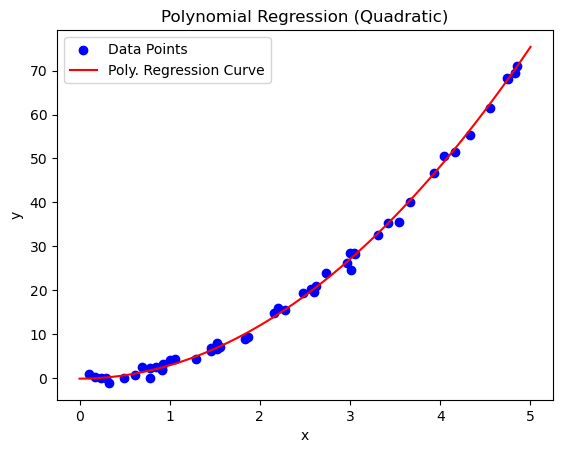

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Generate some example data
np.random.seed(42)

# Assume 50 data points with a quadratic relationship
X = np.sort(5 * np.random.rand(50, 1), axis=0)
y = 3 * X**2 + np.random.normal(0, 1, (50, 1))
# Quadratic relationship with noise

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial features transformation (degree=2 for quadratic)
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)

# Create and train the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Make predictions on the test set
X_test_poly = poly_features.transform(X_test)
y_pred = poly_model.predict(X_test_poly)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse:.2f}")

# Visualize the data and polynomial regression curve
X_range = np.linspace(0, 5, 100).reshape(-1, 1)
X_range_poly = poly_features.transform(X_range)
y_range_pred = poly_model.predict(X_range_poly)

plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X_range, y_range_pred, color='red', label='Poly. Regression Curve')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression (Quadratic)')
plt.legend()
plt.show()


Accuracy: 0.90
Confusion Matrix:
[[9 0]
 [2 9]]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


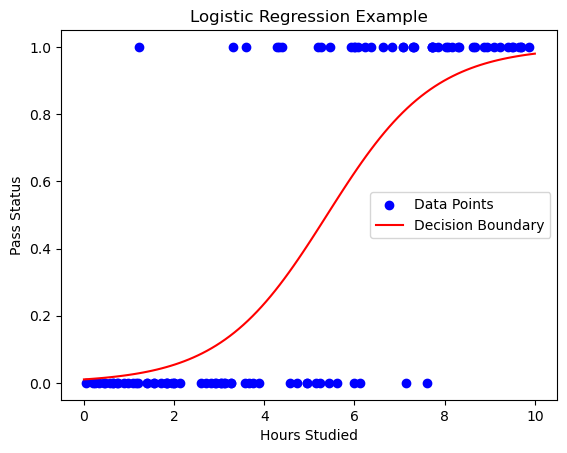

In [6]:
# Import necessary libraries
import numpy as np
import pandas as pd  # Don't forget to import pandas
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Generate some example data
np.random.seed(42)

# Assume 100 students with a binary outcome (pass/fail) based on hours studied
hours_studied = np.random.uniform(0, 10, 100)
pass_probability = 1 / (1 + np.exp(-0.8 * (hours_studied - 5)))

# Sigmoid function
pass_status = np.random.binomial(1, pass_probability)

# Create a DataFrame to organize the data
data = {'Hours_Studied': hours_studied, 'Pass_Status': pass_status}
df = pd.DataFrame(data)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df[['Hours_Studied']], df['Pass_Status'], test_size=0.2, random_state=42
)

# Create and train the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)

# Visualize the data and decision boundary
plt.scatter(df['Hours_Studied'], df['Pass_Status'],
            color='blue', marker='o', label='Data Points')
plt.xlabel('Hours Studied')
plt.ylabel('Pass Status')
plt.title('Logistic Regression Example')

# Plot the decision boundary
x_range = np.linspace(0, 10, 100).reshape(-1, 1)
decision_boundary = logistic_model.predict_proba(x_range)[:, 1]
plt.plot(x_range, decision_boundary, color='red', label='Decision Boundary')

plt.legend()
plt.show()


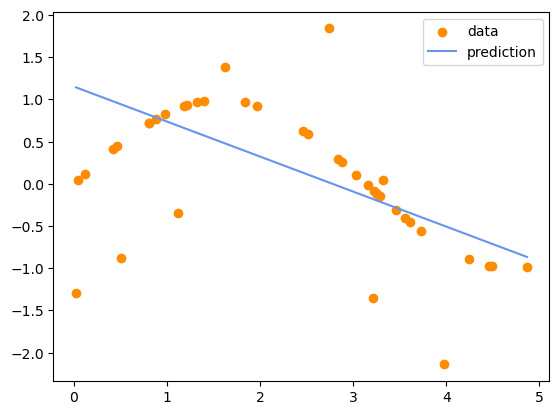

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR

# generate synthetic data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# add some noise to the data
y[::5] += 3 * (0.5 - np.random.rand(8))

# create an SVR model with a linear kernel
svr = SVR(kernel='linear')

# train the model on the data
svr.fit(X, y)

# make predictions on the data
y_pred = svr.predict(X)

# plot the predicted values against the true values
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X, y_pred, color='cornflowerblue', label='prediction')
plt.legend()
plt.show()


Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



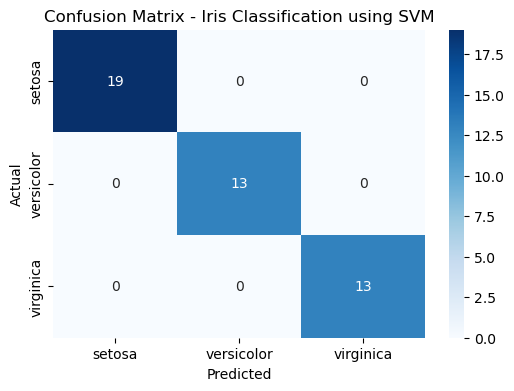

In [8]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the SVM classifier with an RBF kernel
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')  # You can try 'linear' or 'poly' too
svm_model.fit(X_train, y_train)

# Predict on test data
y_pred = svm_model.predict(X_test)

# Evaluate performance
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Iris Classification using SVM')
plt.show()


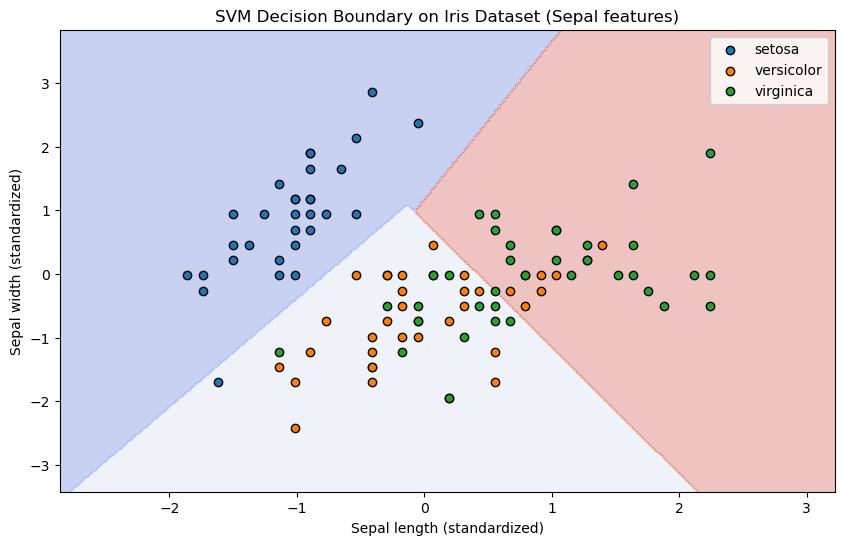

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the iris dataset (use 2 features for 2D visualization)
iris = datasets.load_iris()
X = iris.data[:, :2]  # Sepal length and sepal width
y = iris.target
target_names = iris.target_names

# Split and standardize the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)

# Create a mesh grid for decision boundary
h = 0.02
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)

# Plot training points
for i, label in enumerate(np.unique(y_train)):
    plt.scatter(X_train[y_train == label, 0], X_train[y_train == label, 1],
                label=target_names[label], edgecolors='k')

plt.xlabel('Sepal length (standardized)')
plt.ylabel('Sepal width (standardized)')
plt.title('SVM Decision Boundary on Iris Dataset (Sepal features)')
plt.legend()
plt.show()


Accuracy: 0.95


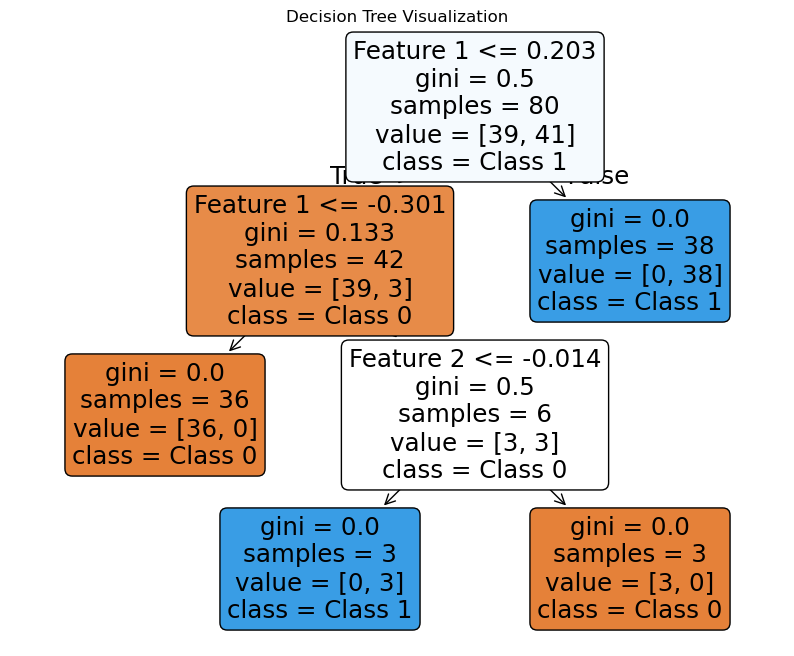

In [11]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a toy dataset for binary classification
X, y = make_classification(n_samples=100, n_features=2, n_classes=2,
                           n_informative=2, n_redundant=0, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

# Create and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Visualize the Decision Tree
plt.figure(figsize=(10, 8))
plot_tree(dt_model, filled=True, feature_names=['Feature 1', 'Feature 2'],
          class_names=['Class 0', 'Class 1'], rounded=True)
plt.title('Decision Tree Visualization')
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


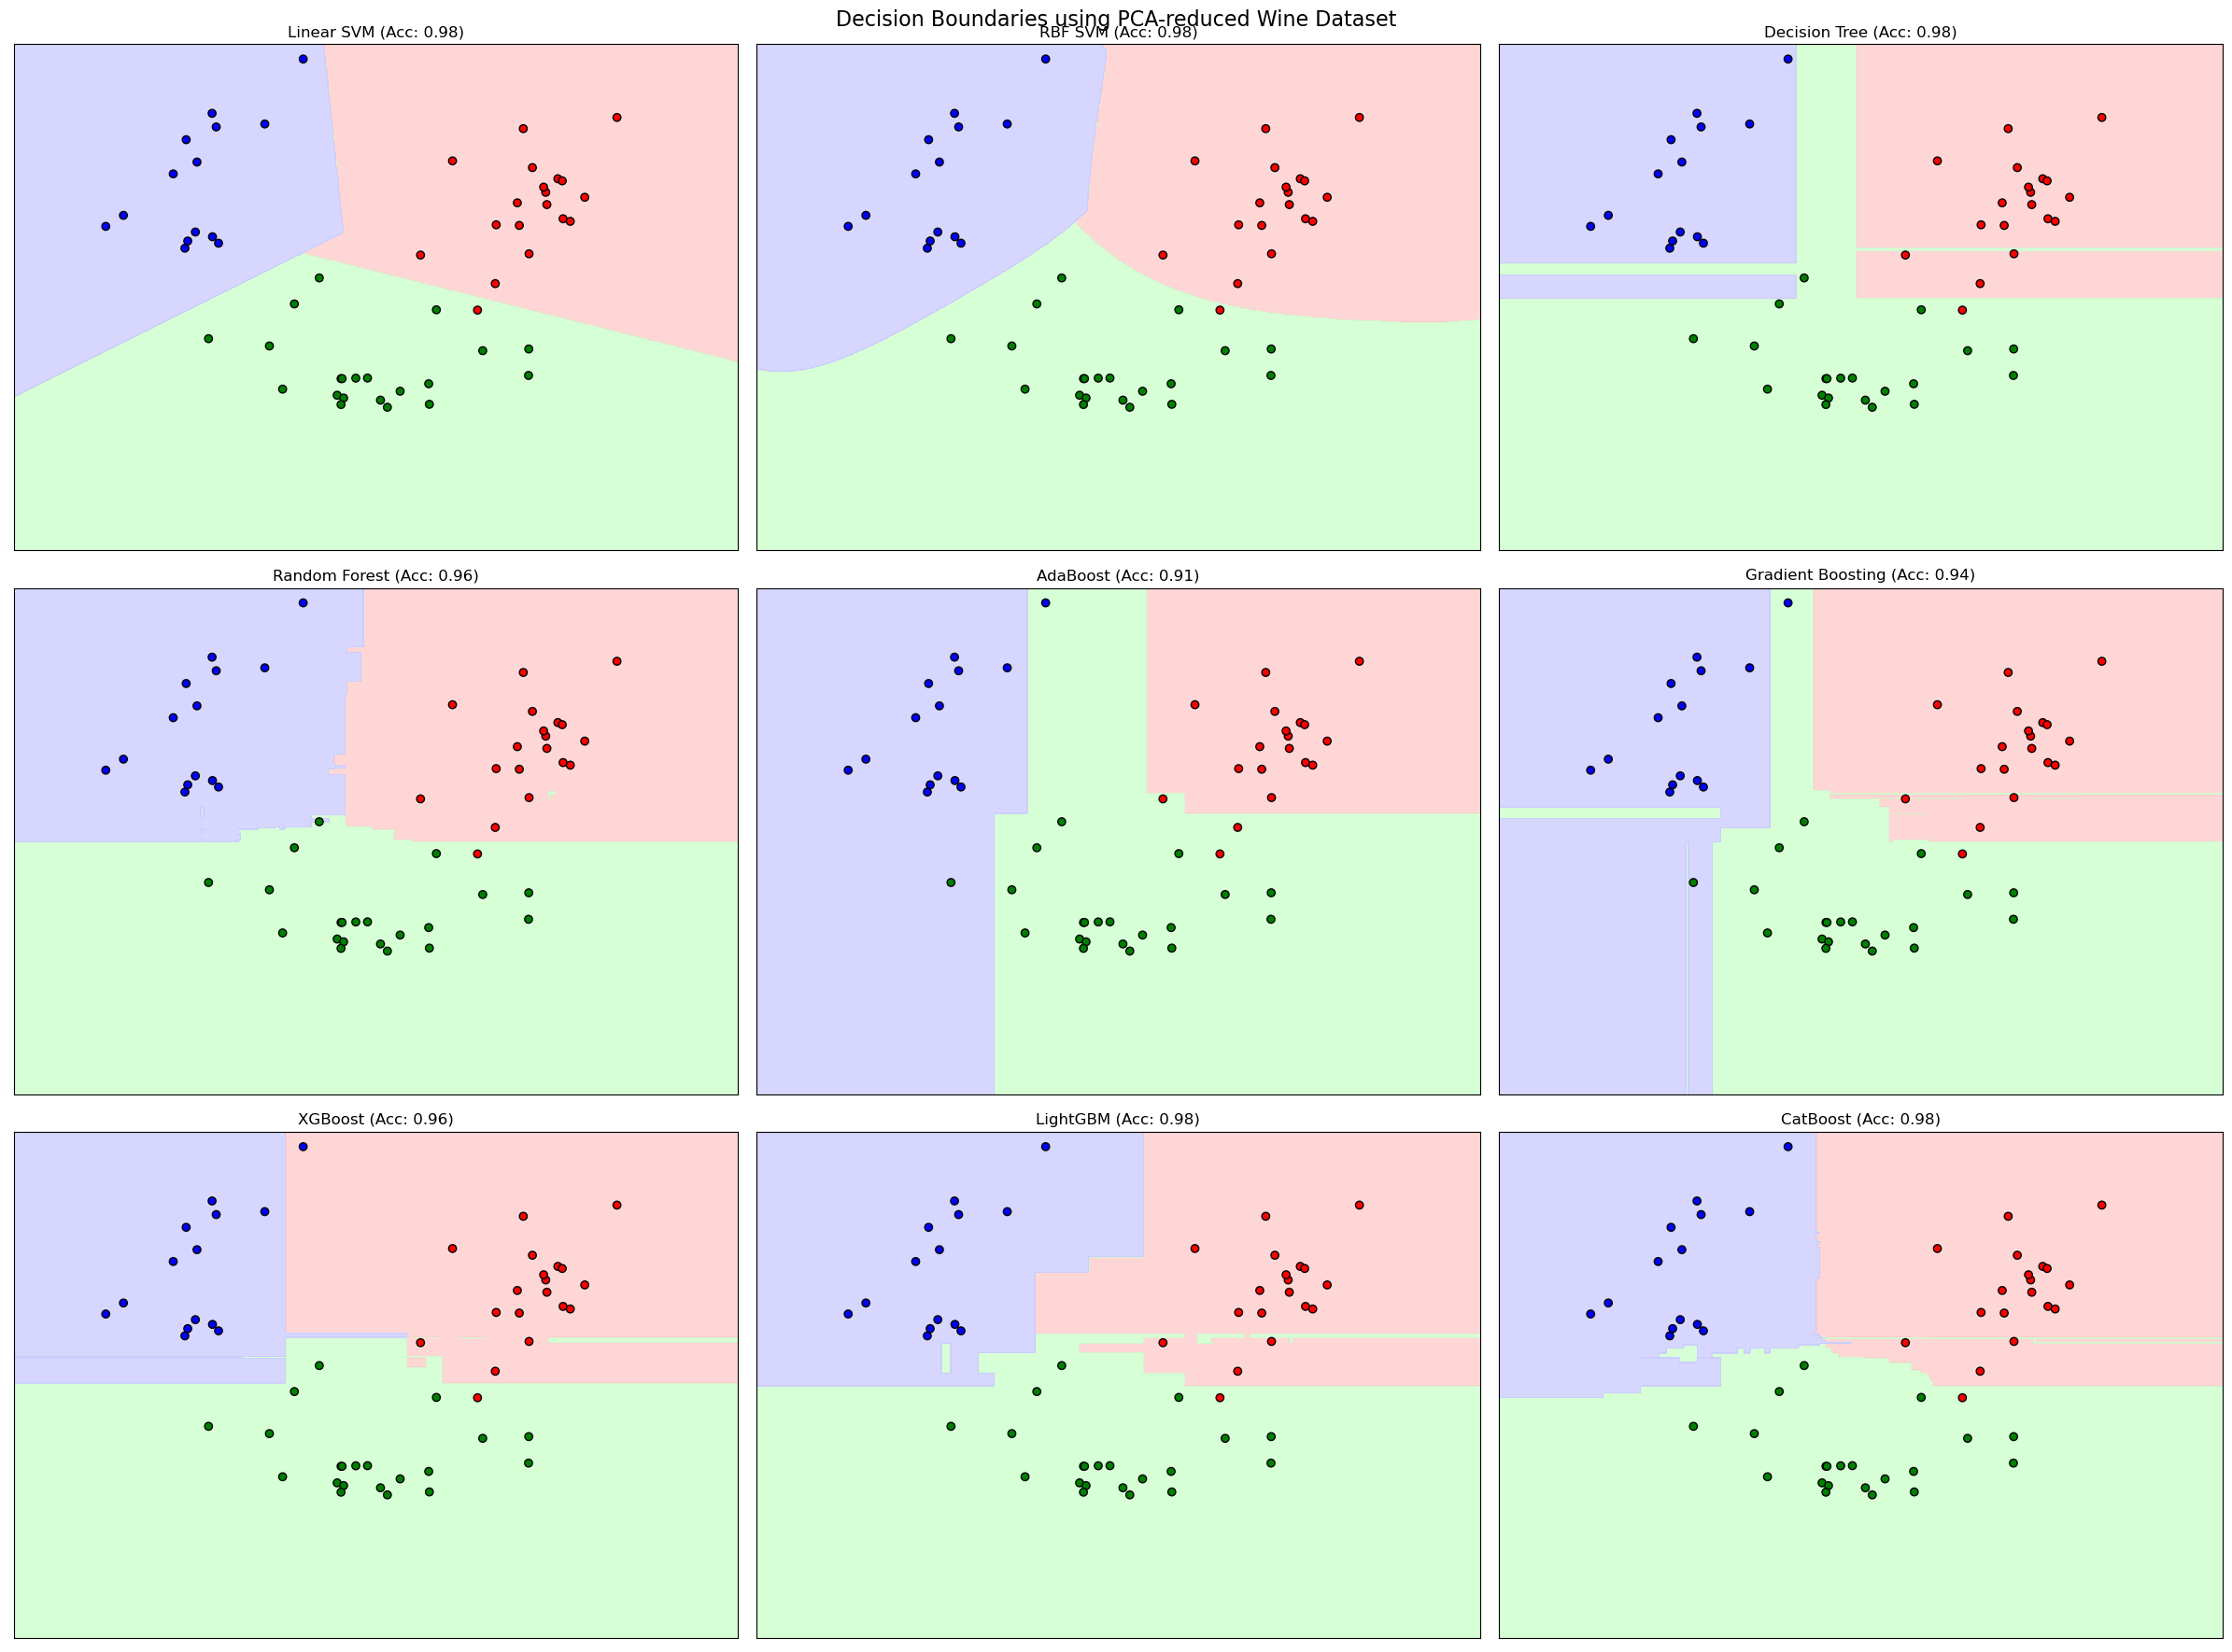

✅ Model Accuracy Comparison on Wine Dataset:



,Classifier,Accuracy
0,Linear SVM,0.981481
1,RBF SVM,0.981481
2,Decision Tree,0.981481
3,LightGBM,0.981481
4,CatBoost,0.981481
5,Random Forest,0.962963
6,XGBoost,0.962963
7,Gradient Boosting,0.944444
8,AdaBoost,0.907407


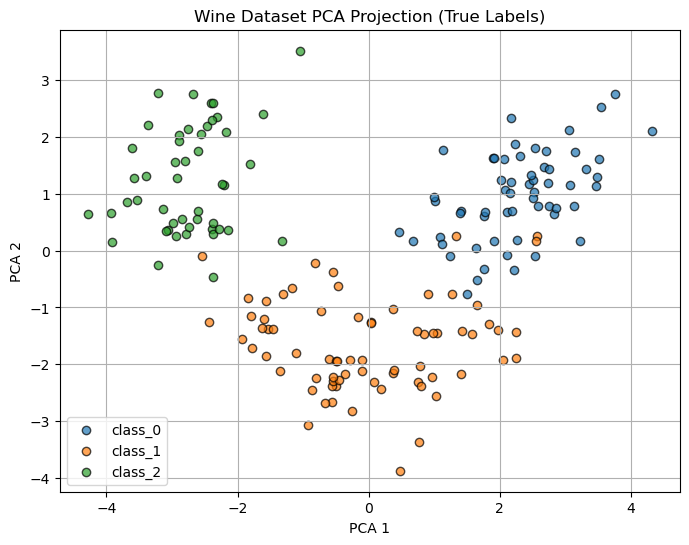

In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

# Classifiers
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Load data
wine = load_wine()
X = wine.data
y = wine.target
target_names = wine.target_names

# Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# PCA (2D projection)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# Define classifiers
names = [
    "Linear SVM", "RBF SVM", "Decision Tree", "Random Forest",
    "AdaBoost", "Gradient Boosting", "XGBoost", "LightGBM", "CatBoost"
]

classifiers = [
    SVC(kernel="linear", C=1),
    SVC(kernel="rbf", gamma='scale', C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(n_estimators=100, max_depth=5),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', verbosity=0),
    LGBMClassifier(verbosity=-1),
    CatBoostClassifier(verbose=0)
]

# Results and visualizations
results = []
h = .01  # mesh step size
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot decision boundaries
plt.figure(figsize=(24, 18))
for i, (name, clf) in enumerate(zip(names, classifiers)):
    clf.fit(X_train_pca, y_train)
    acc = clf.score(X_test_pca, y_test)
    results.append((name, acc))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax = plt.subplot(3, 3, i + 1)
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(['#FFCCCC', '#CCFFCC', '#CCCCFF']))
    scatter = ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, edgecolor='k', cmap=ListedColormap(['red', 'green', 'blue']))
    ax.set_title(f"{name} (Acc: {acc:.2f})")
    ax.set_xticks(())
    ax.set_yticks(())

plt.suptitle("Decision Boundaries using PCA-reduced Wine Dataset", fontsize=16)
plt.tight_layout()
plt.show()

# Accuracy results table
results_df = pd.DataFrame(results, columns=["Classifier", "Accuracy"])
results_df = results_df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)
print("✅ Model Accuracy Comparison on Wine Dataset:\n")
display(results_df)

# Optional: show original data in PCA space
plt.figure(figsize=(8, 6))
for label in np.unique(y):
    plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1], label=target_names[label], alpha=0.7, edgecolors='k')
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Wine Dataset PCA Projection (True Labels)")
plt.legend()
plt.grid(True)
plt.show()
